# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [46]:
#read the data

data_path = 'data.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [47]:
# Let's see the data types and non-null values for each column
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## All data types are fine!

In [48]:
df.drop(['CUST_ID'], axis=1, inplace=True)   # CUST_ID is categorical

## All value ranges are fine except CASH_ADVANCE_FREQUENCY has values greater than 1.

In [49]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [50]:
duplicates = df.duplicated()   #no duplicates
df[duplicates]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [51]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)    

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [52]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 313 missing value in MINIMUM_PAYMENTS column and 1 missing value in CREDIT_LIMIT column

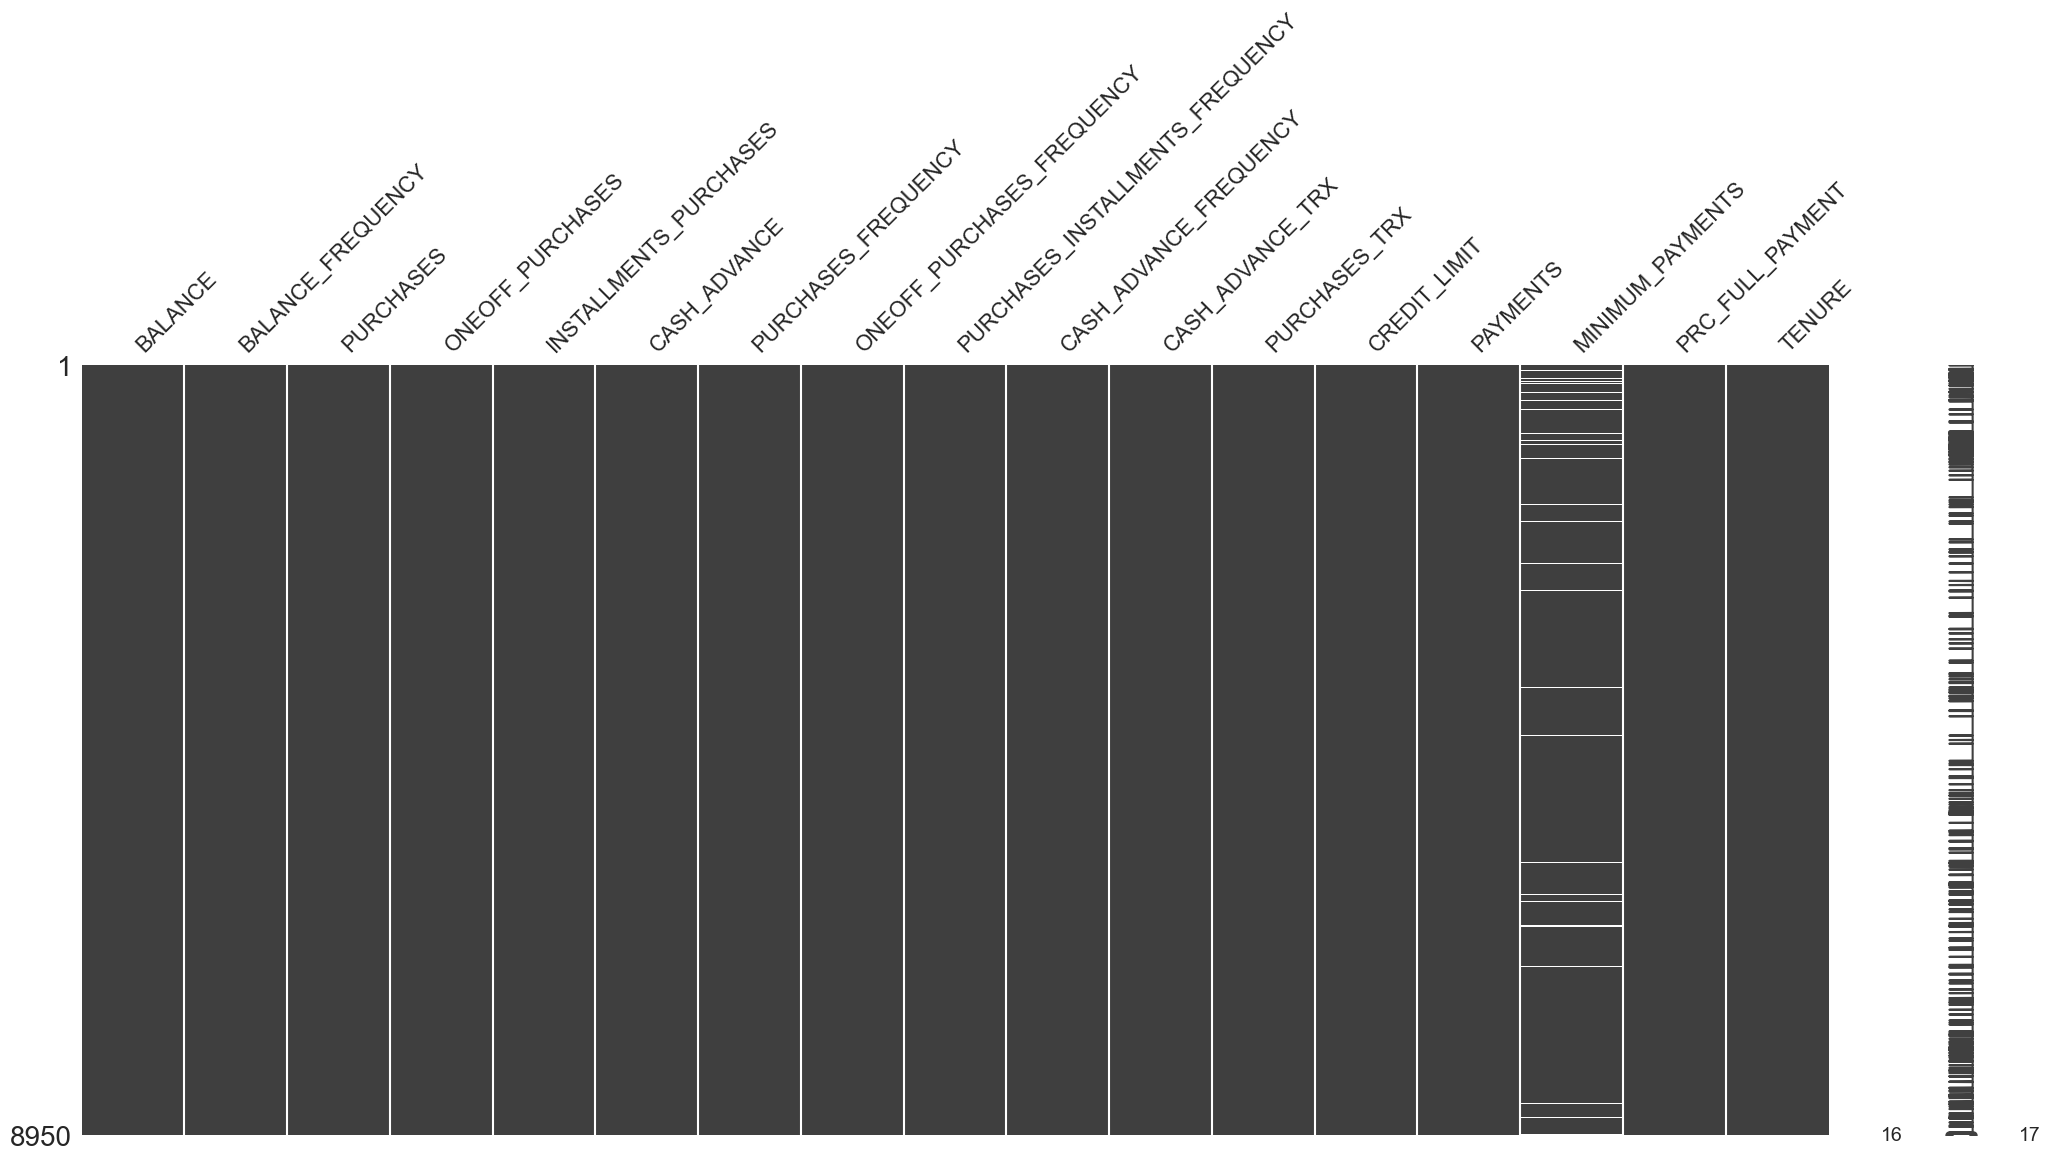

In [53]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(df)
plt.show()

# it seems like the missingness are distributed randomly

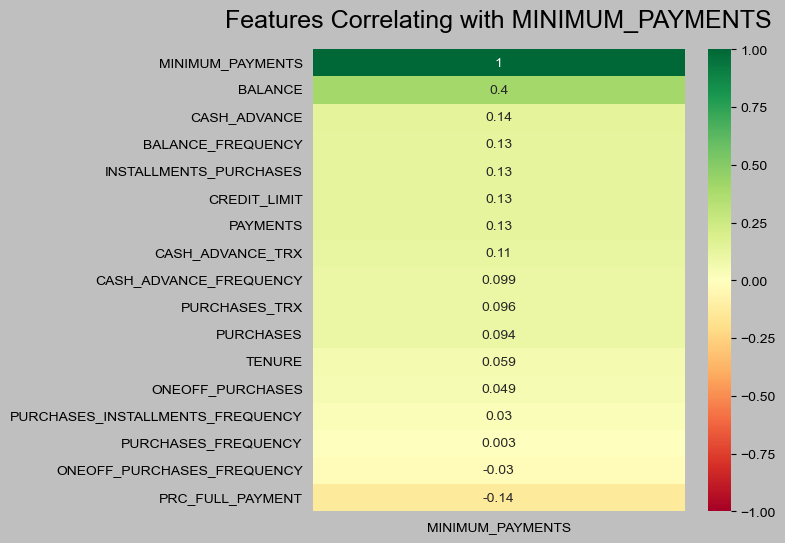

In [54]:
plt.style.use('grayscale')
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['MINIMUM_PAYMENTS']].sort_values(by='MINIMUM_PAYMENTS', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with MINIMUM_PAYMENTS', fontdict={'fontsize':18}, pad=16);

## there is no high correlation with other columns.

In [55]:
df.iloc[:, 1:].skew()    #skewed data

BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- CUST_ID is categorical drop it.<br>
2- CASH_ADVANCE_FREQUENCY has values greater than 1.<br>
3- MINIMUM_PAYMENTS, CREDIT_LIMIT has null values  <br>
4- skewed data

In [56]:
#make a copy for the original dataset
df_copy=df.copy()

**second issue**

In [57]:
df.loc[df['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1

In [58]:
#test 
assert df['CASH_ADVANCE_FREQUENCY'].max() == 1

**third issue**

## There are some methods to fill the missing values like :
## -Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.
## -Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.
## -Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.
## so Mean imputation is suitable here as most columns are skewed.

In [59]:
#solution: impute nulls with median
median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)

In [60]:
median_CREDIT_LIMIT = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_CREDIT_LIMIT, inplace=True)

In [61]:
#test
assert df['MINIMUM_PAYMENTS'].isnull().sum() == 0
assert df['CREDIT_LIMIT'].isnull().sum() == 0

## forth issue

In [62]:
#solution: log_transformation to deal with skewed data
sk_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

In [63]:
for col in sk_cols:
    df[col] = np.log(1 + df[col])

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

In [94]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## use elbow method 

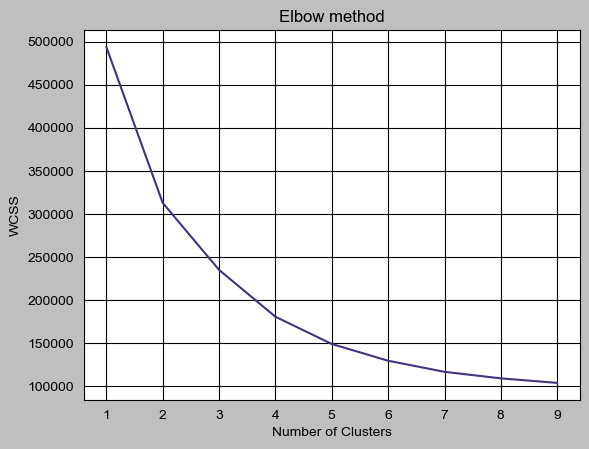

In [92]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## apply tsne to see the structure of the data

In [65]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

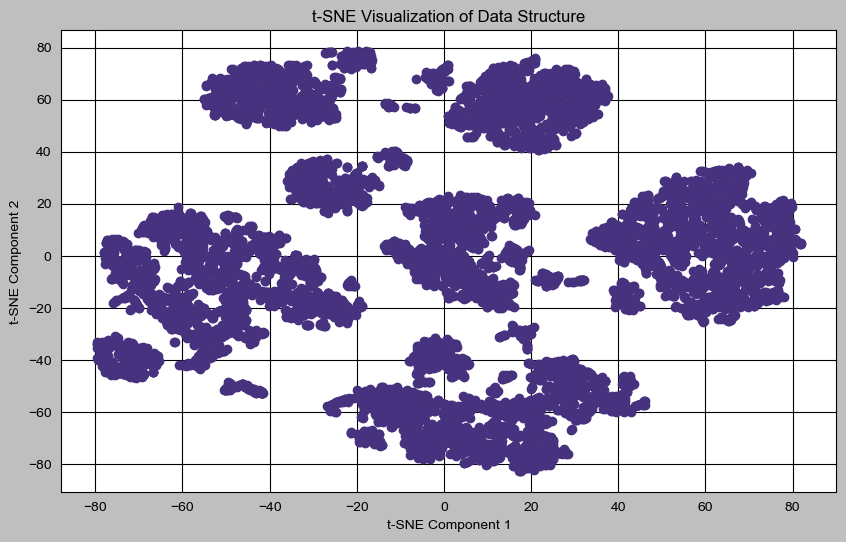

In [66]:
visualization_df = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
sns.set_palette("viridis")

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(visualization_df['t-SNE Component 1'], visualization_df['t-SNE Component 2'])
plt.title('t-SNE Visualization of Data Structure')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## it seems like the data can be divided into 7 clusters

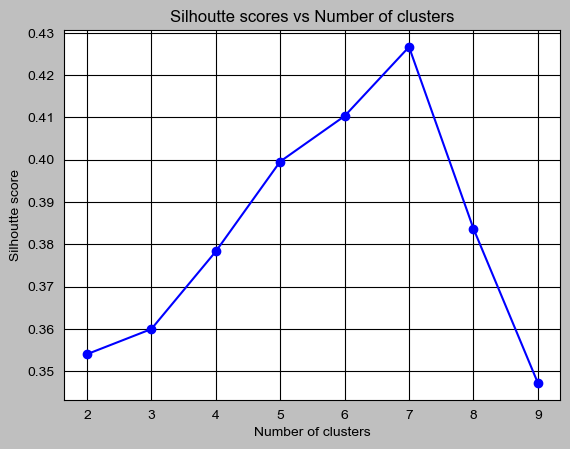

In [67]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df) for k in range (1, 10)]
silhoutte_scores = [silhouette_score(df, model.labels_) for model in kmeans_models[1:11]]
plt.plot(range(2,10), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4 , 5 , 6 , 7 , 8 , 9 ])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

## try with num of clusters=7

In [68]:
kmeans = KMeans(n_clusters = 7, random_state=0)
labels = kmeans.fit_predict(df)

## use PCA to visualize the clusters

In [70]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

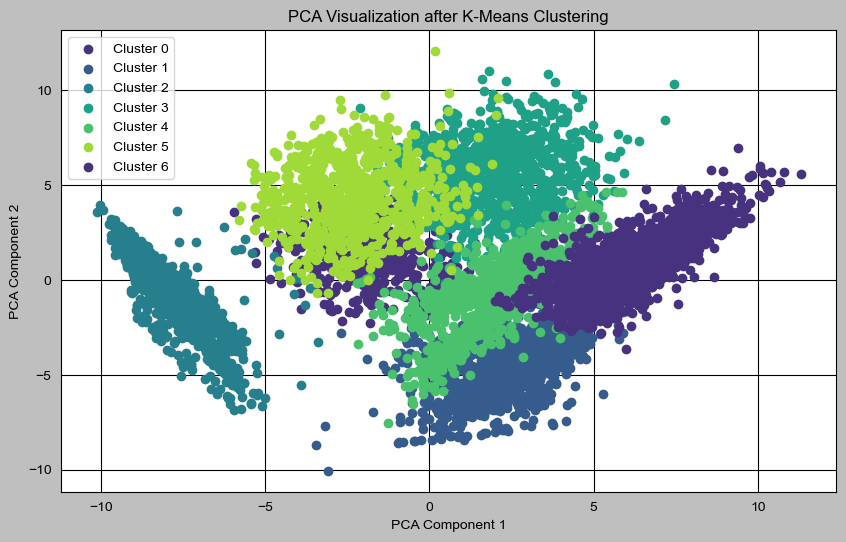

In [71]:
visualization_df = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2'])
visualization_df['Cluster'] = labels
sns.set_palette("viridis")

# Plot the PCA visualization with cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(7):
    cluster_points = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA Component 1'], cluster_points['PCA Component 2'], label=f'Cluster {cluster}')

plt.title('PCA Visualization after K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [72]:
# Apply PCA to reduce dimensions to 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)

In [73]:
visualization_df = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
visualization_df['Cluster'] = labels
sns.set_palette("viridis")
# Create an interactive 3D scatter plot 
fig = px.scatter_3d(visualization_df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster',labels={'Cluster': 'Cluster'},template='plotly_white') 

# Show the plot
fig.show()

## Perform k-means clustering on the PCA result

## try to use 5 components

In [89]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df)

In [90]:
kmeans = KMeans(n_clusters=7, random_state=0)
labels_pca = kmeans.fit_predict(pca_result)

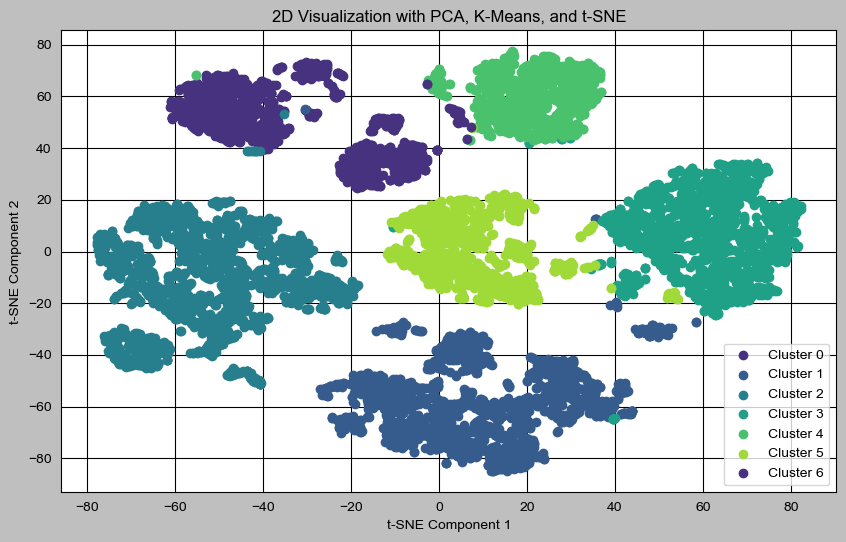

In [91]:
# Apply t-SNE to reduce dimensions to 2D on the PCA+k-means result
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pd.concat([df, pd.DataFrame({'Cluster': labels_pca})], axis=1))

# Create a dataframe for visualization with cluster labels
visualization_df = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
visualization_df['Cluster'] = labels_pca
sns.set_palette("viridis")

# Plot the 2D scatter plot with cluster labels after PCA and k-means
plt.figure(figsize=(10, 6))
for cluster in range(7):
    cluster_points = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_points['t-SNE Component 1'], cluster_points['t-SNE Component 2'], label=f'Cluster {cluster}')

plt.title('2D Visualization with PCA, K-Means, and t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

## Hierarchial Clustering

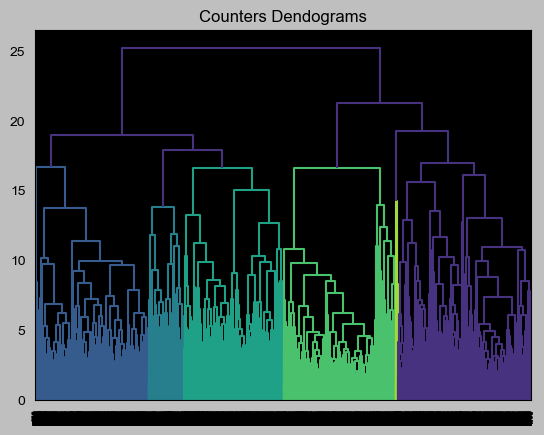

In [153]:
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df ,
                                  method='complete',
                                  metric='euclidean'),
                        orientation='top')

In [154]:
n_clusters = 7

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df)

AgglomerativeClustering(n_clusters=7)

In [155]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

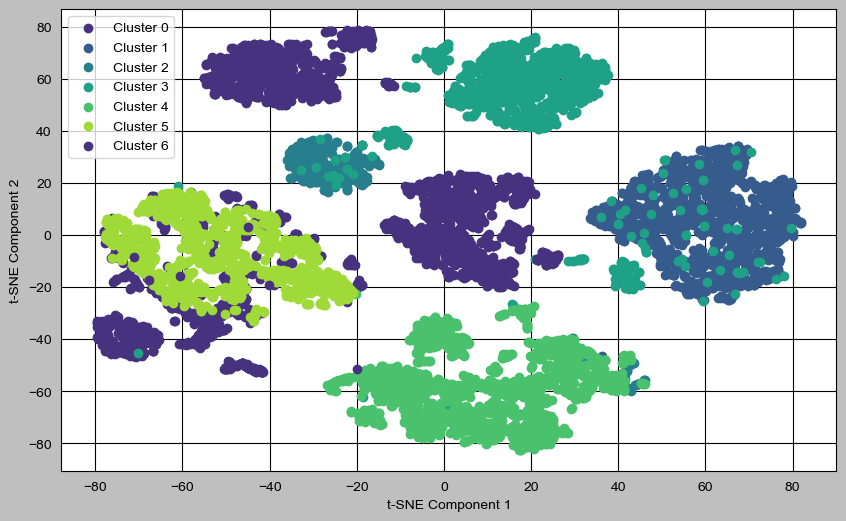

In [156]:
# Create a dataframe for visualization
visualization_df = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
visualization_df['Cluster'] = labels
sns.set_palette("viridis")

# Plot the 2D scatter plot with cluster labels after hierarchical clustering and t-SNE
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_points['t-SNE Component 1'], cluster_points['t-SNE Component 2'], label=f'Cluster {cluster}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

## DBSCAN

In [127]:
from sklearn.cluster import DBSCAN
DB_model = DBSCAN(eps=2.5, min_samples=5).fit(df) 

In [128]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

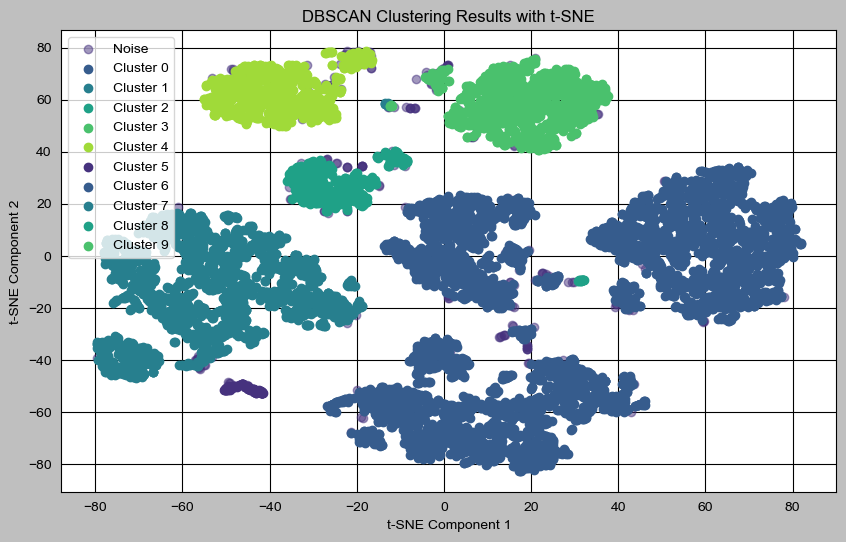

In [129]:
# Create a dataframe for visualization
visualization_df = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
visualization_df['Cluster'] = DB_model.labels_
sns.set_palette("viridis")

# Plot the 2D scatter plot
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(DB_model.labels_)
for cluster in unique_clusters:
    if cluster == -1:
        # Noise points (outliers) are plotted separately
        noise_points = visualization_df[visualization_df['Cluster'] == cluster]
        plt.scatter(noise_points['t-SNE Component 1'], noise_points['t-SNE Component 2'], label=f'Noise', alpha=0.5)
    else:
        cluster_points = visualization_df[visualization_df['Cluster'] == cluster]
        plt.scatter(cluster_points['t-SNE Component 1'], cluster_points['t-SNE Component 2'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering Results with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

## GMM

In [144]:
pca = PCA(n_components=7)
pca_result = pca.fit_transform(df)

In [149]:
from sklearn.mixture import GaussianMixture
# Fit GMM model
gmm_model = GaussianMixture(n_components=7)
gmm_model.fit(pca_result)
labels = gmm_model.predict(pca_result)

In [150]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

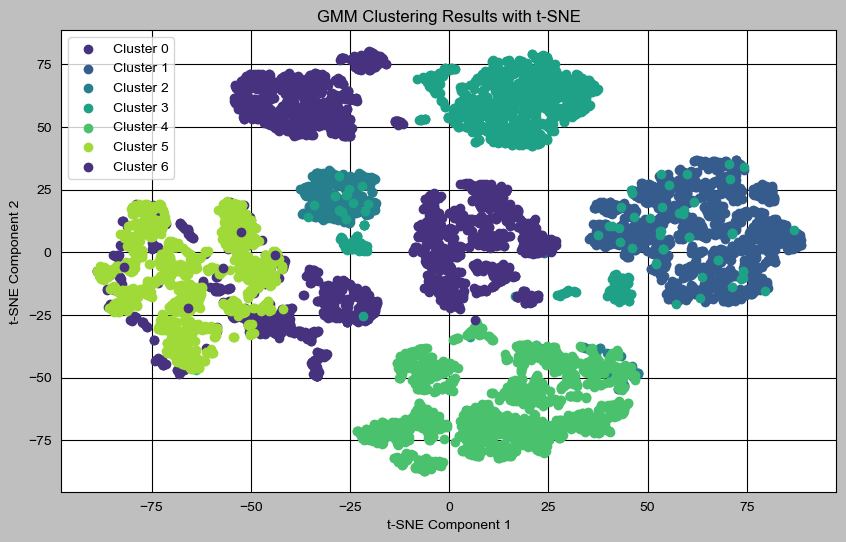

In [151]:
# Create a dataframe for visualization
visualization_df = pd.DataFrame(tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
visualization_df['Cluster'] = labels
sns.set_palette("viridis")

# Plot the 2D scatter plot 
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(labels)
for cluster in unique_clusters:
    cluster_points = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_points['t-SNE Component 1'], cluster_points['t-SNE Component 2'], label=f'Cluster {cluster}')

plt.title('GMM Clustering Results with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [152]:
silhoutte_scores = silhouette_score(pca_result, labels) 
print("silhoutte_scores = " , silhoutte_scores)

silhoutte_scores =  0.3069845377135512


## it seems like kmeans gives the best results.

## let's interpret the clusters

In [164]:
df_copy['cluster'] = labels_pca

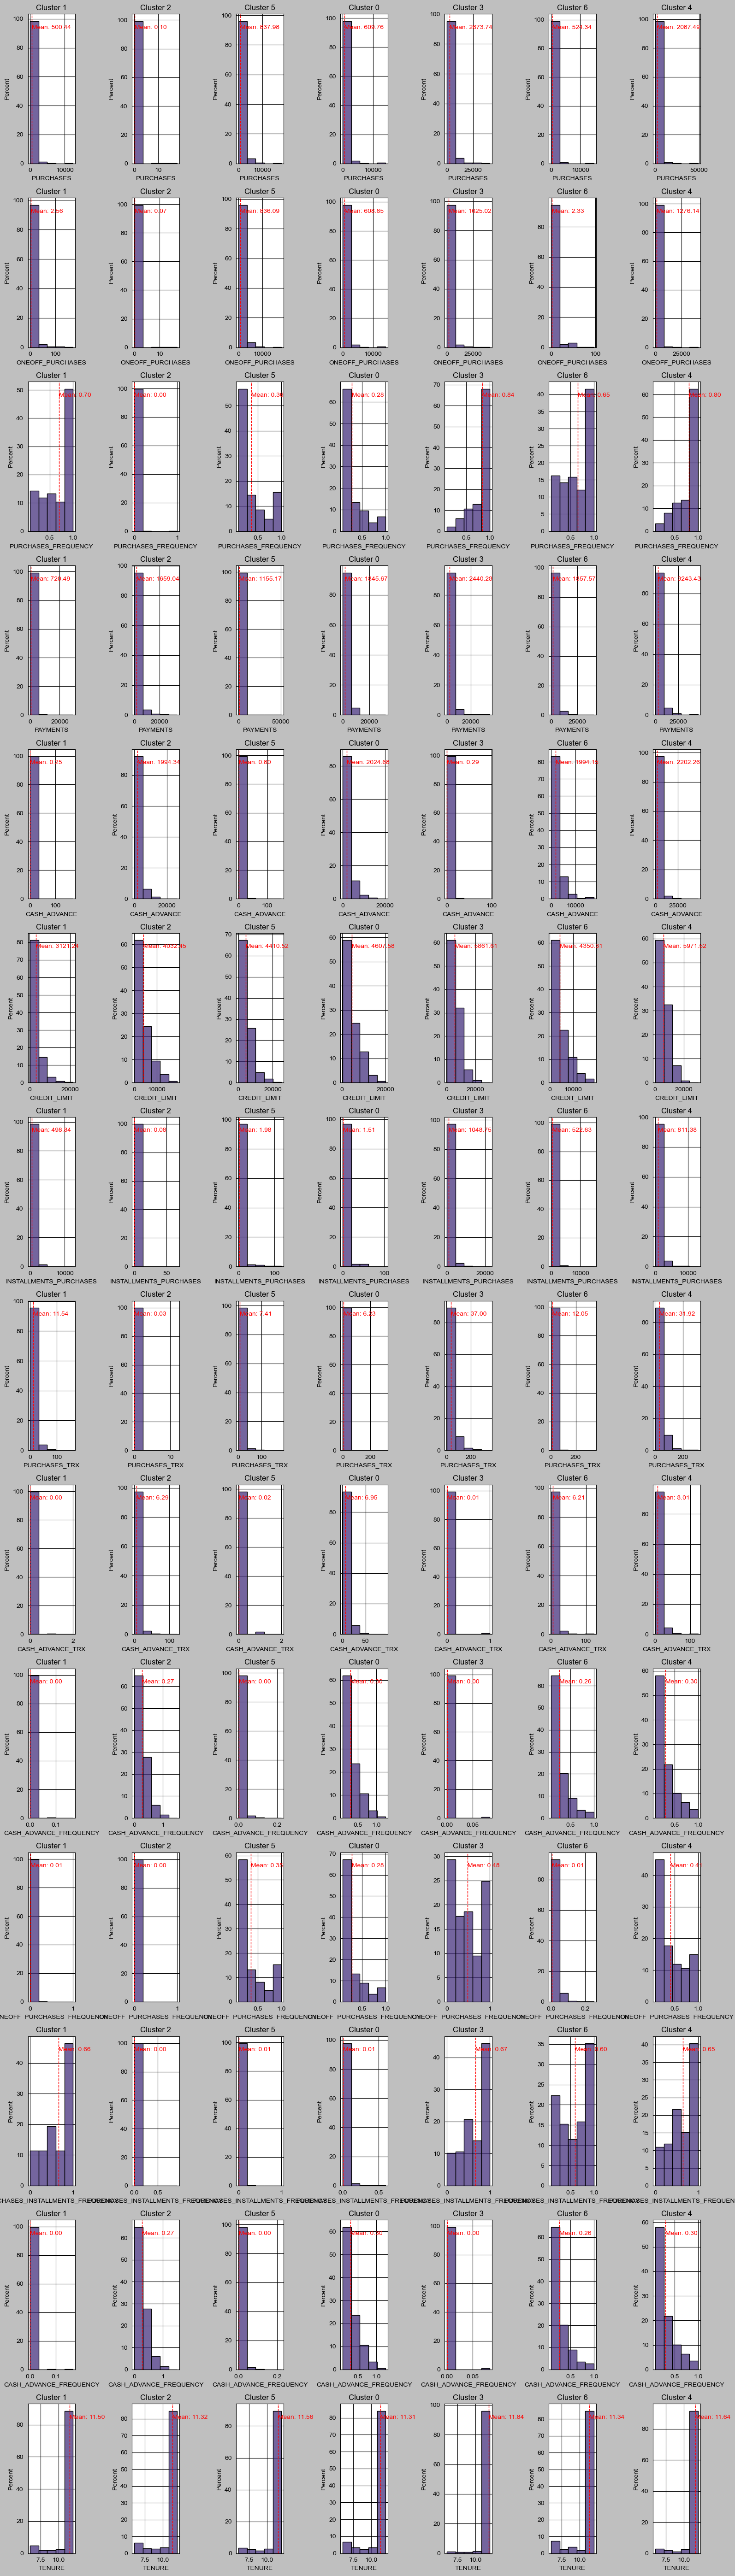

In [165]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
clusters = df_copy['cluster'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = df_copy[df_copy['cluster'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='r', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='r')

# Adjust layout
plt.tight_layout()
plt.show()

In [166]:
df_copy.groupby('cluster')[cols].mean()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_FREQUENCY,PAYMENTS,CASH_ADVANCE,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,PURCHASES_TRX,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,TENURE
cluster,,,,,,,,,,,,,,
0,609.758176,608.651384,0.280933,1845.671013,2024.677608,4607.578045,1.508893,6.225157,6.949686,0.298925,0.275772,0.007196,0.298925,11.305660
1,500.435470,2.559551,0.699174,720.489780,0.253877,3121.238575,498.835788,11.535941,0.004228,0.000396,0.005953,0.662678,0.000396,11.501586
2,0.101828,0.068322,0.002183,1659.043041,1994.341253,4032.446380,0.075551,0.025629,6.290619,0.272101,0.001216,0.001007,0.272101,11.322534
3,2673.744411,1625.021690,0.837124,2440.277105,0.286645,5861.611848,1048.752617,37.000000,0.007932,0.000661,0.483009,0.669905,0.000661,11.835265
4,2087.493525,1276.137487,0.797978,3243.429328,2202.264221,5971.524080,811.379702,31.915868,8.008520,0.297951,0.411050,0.645894,0.297951,11.641108
5,837.980229,836.086623,0.355785,1155.173792,0.802428,4410.519442,1.976218,7.413369,0.020229,0.001675,0.350220,0.006702,0.001675,11.558487
6,524.341646,2.330250,0.650144,1857.571737,1994.148827,4350.312500,522.633875,12.050000,6.206250,0.261826,0.006564,0.600070,0.261826,11.343750


## Cluster 0: "Occasional Spenders"

These customers make infrequent purchases with a moderate credit limit.
They show a balanced usage of cash advances and purchases in installments.
Targeting them with occasional promotions or discounts might encourage more frequent spending.

## Cluster 1: "Frequent Shoppers with Constraints"

This group comprises customers who make frequent purchases but have lower credit limits.
They tend to avoid cash advances and prefer purchasing in installments.
Tailor marketing efforts towards credit limit increases, loyalty programs, and installment-friendly promotions.

## Cluster 2: "Inactive Low-Spenders"

Customers in this cluster exhibit very low purchasing activity and credit limit usage.
They might need personalized incentives or campaigns to reactivate their card usage.
Consider offering exclusive promotions to encourage the first few purchases.

## Cluster 3: "High-Value, Reliable Customers"

This cluster represents high-value customers who make substantial and frequent purchases.
They have high credit limits and consistently make payments.
Target loyalty programs, exclusive offers, and premium services to retain and nurture this customer segment.

## Cluster 4: "Balanced Spenders with Cash Advances"

Customers in this group exhibit a balance between high purchases and cash advance usage.
Target them with promotions that combine cash advance benefits with discounts on purchases.

## Cluster 5: "Cash Advance Users"

This cluster consists of customers with low purchase activity but a higher preference for cash advances.
Consider marketing campaigns that emphasize the convenience and benefits of cash advances.

## Cluster 6: "Moderate and Diverse Spenders"

Customers in this group make moderate purchases across different categories.
They use cash advances moderately and prefer purchases in installments.
Tailor marketing messages to highlight the versatility of their credit card for various spending needs.